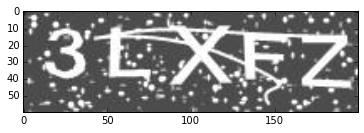

In [16]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("test.jpeg")
plt.imshow(image)

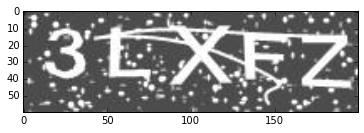

In [19]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline
pil_im = Image.open('test.jpeg', 'r')
imshow(np.asarray(pil_im))

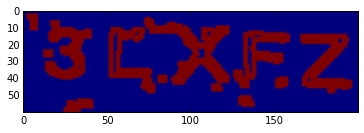

In [52]:
import numpy as np
import cv2
kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(image,kernel,iterations=1)
blurred = cv2.GaussianBlur(erosion,(5,5),0)
edged = cv2.Canny(blurred,30,150)
dilation = cv2.dilate(edged,kernel,iterations=1)
plt.imshow(dilation)

In [64]:
contours, a = cv2.findContours(dilation.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#print contours
cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contours], key = lambda x:x[1])
#print cnts
ary = []
for (c, _) in cnts:
   (x,y,w,h) = cv2.boundingRect(c)
   #print x,y,w,h
   if w>15 and h>15:
       ary.append((x,y,w,h))

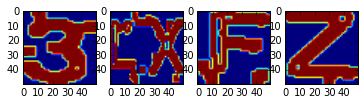

In [63]:
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = dilation[y:y +h, x:x +w]
    thresh = roi.copy()
    a=fig.add_subplot(1,len(ary),id+1)
    res=cv2.resize(thresh,(50,50))
    cv2.imwrite("%d.png"%(id),res)
    plt.imshow(res)

In [60]:
import string 
d = dict.fromkeys(string.ascii_uppercase,0)
a = [i for i in d.keys()]
a.sort()
for i in a:
    print i,

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z


In [61]:
pic0 = cv2.imread("0.png")
pic1 = cv2.imread("1.png")
pic2 = cv2.imread("2.png")
pic3 = cv2.imread("3.png")
pic4 = cv2.imread("4.png")

def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [62]:
import os 

def getNumber(pic):
    min_a = 9999999999
    min_png = None
    for png in os.listdir('alphabet'):
        ref = cv2.imread("alphabet/"+png)
        if mse(ref,pic) < min_a:
            min_a = mse(ref,pic)
            min_png = png
    return min_png, min_a
print getNumber(pic0)

OSError: [Errno 2] No such file or directory: 'alphabet'